# Dealing with Data (2023)
## RQ1
- bar chart (positive, neutral and negative)
- word cloud

In [33]:
%%capture # supress output from this cell

# imports
from afinn import Afinn
from os import path
import matplotlib.pyplot as plt
import nltk as nt
import pandas as pd
import wordcloud as wc

# TODO: uncomment the following two lines for the first time you run this program!
nt.download('punkt')
nt.download('stopwords')

# matplotlib things
plt.figure(figsize=(3,6), dpi=60)
plt.style.use('seaborn-v0_8')

UsageError: unrecognized arguments: supress output from this cell


In [34]:
# define some stopwords
stop = nt.corpus.stopwords.words('english')
for i in '$-@_.&+#!*\\(),\'"?:%':
	stop.append(i)
stop.append('n\'t')

# read the data
data = pd.read_csv('Datafiniti_Hotel_Reviews.csv', header=0, sep=',', on_bad_lines='skip')

# extract the title and body text of each review into a large list
bodies, titles = data['reviews.text'].astype(str), data['reviews.title'].astype(str)

"""
remove extraneous words that should not be analysed: 
remove "... More" from reviews (if it exists):
	"... More" (captured while web-scraping)
	"Bad", "Good" (those should not be affecting the sentiment calculated later)
"""
bodies = bodies.str.replace('((Bad|Good):)|(\\.\\.\\. More)', '', regex=True)

# tokenise, remove stop words and puncutation
bodies_tokens = (bodies.apply(nt.word_tokenize)).apply(lambda x: [token for token in x if token.lower() not in stop])

# get a large array of all tokens to be analysed
bodies_tokens_raw = []
for bodies_sentence in bodies_tokens:
	for bodies_token in bodies_sentence:
		bodies_tokens_raw.append(bodies_token)

# create a list of tuples (token, sentiment)
tokens_sentiments = []

# sentiment analysis starts here.
afn = Afinn()

# loop through the tokens one by one, assign each word a score, then add it to the list.
for token in bodies_tokens_raw:
	tokens_sentiments.append(tuple((token, afn.score(token))))
# print(tokens_sentiments[:6])

# filter the sentiment data into three categories: positive, neutral and negative.
sentiments_pos, sentiments_neg, sentiments_neu = [], [], []
for token_sentiment in tokens_sentiments:
	if token_sentiment[1] > 0:
		sentiments_pos.append(token_sentiment)
	elif token_sentiment[1] < 0:
		sentiments_neg.append(token_sentiment)
	else:
		sentiments_neu.append(token_sentiment)

# generate a string of positive and negative tokens
# these will be used for generating the wordclouds.
tokens_pos = "".join(token_pos[0] + " " for token_pos in sentiments_pos)
tokens_neg = "".join(token_neg[0] + " " for token_neg in sentiments_neg)

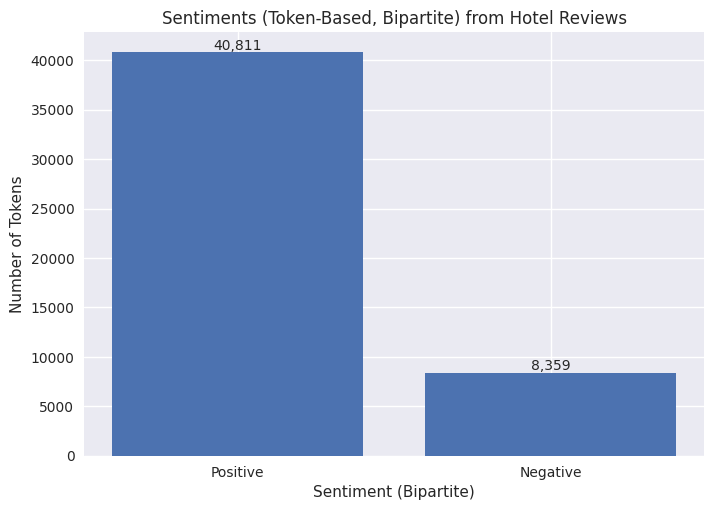

In [35]:
# plot a bar graph for bipartite sentiments (+ve, -ve)
figure, axes = plt.subplots()
bars_container = axes.bar(['Positive', 'Negative'], [len(sentiments_pos), len(sentiments_neg)])
axes.set_title('Sentiments (Token-Based, Bipartite) from Hotel Reviews')
axes.set_xlabel("Sentiment (Bipartite)")
axes.set_ylabel('Number of Tokens')
axes.bar_label(bars_container, fmt="{:,.0f}")
plt.savefig("./results/rq1/bar_bipartite.png", dpi=600)

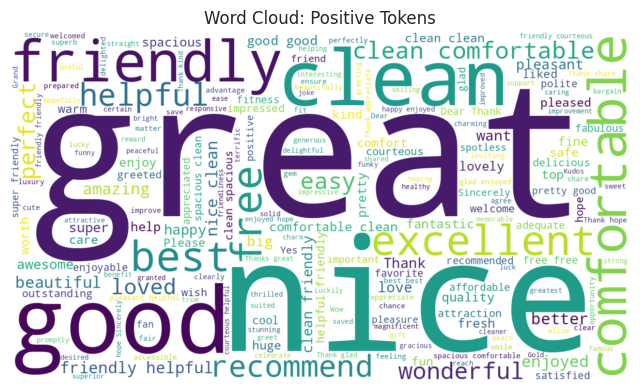

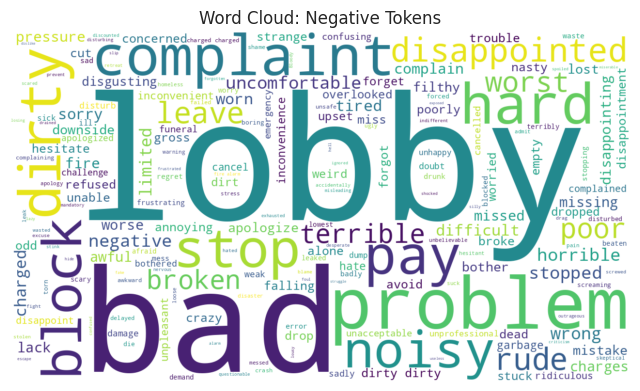

In [38]:
# wordcloud (positive tokens)
wordcloud = wc.WordCloud(background_color="white", mode="RGB", width=1280, height=720)
wordcloud.generate(tokens_pos)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud: Positive Tokens")
plt.show()
wordcloud.to_file("./results/rq1/wordcloud_pos.png",)
# plt.savefig("./results/rq1/wordcloud_pos.png", dpi=600)

# wordcloud (negative tokens)
wordcloud.generate(tokens_neg)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud: Negative Tokens")
plt.show()
wordcloud.to_file("./results/rq1/wordcloud_neg.png")